# Homework06

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Exercise 2: Regression

First, we prepare the dataset `oceanographic_data.csv` again.

In [30]:
df = pd.read_csv('../data/oceanographic_data.csv', low_memory=False)
df.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,NaN,...,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,NaN,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,NaN,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prepare the data, with the only features we want for the regression and clear potential na values from the dataset.

In [31]:
# filter for important features
df_regression = df[['Salnty', 'Depthm', 'T_degC']]
df_regression

,Salnty,Depthm,T_degC
0,33.4400,0,10.500
1,33.4400,8,10.460
2,33.4370,10,10.460
3,33.4200,19,10.450
4,33.4210,20,10.450
...,...,...,...
864858,33.4083,0,18.744
864859,33.4083,2,18.744
864860,33.4150,5,18.692
864861,33.4062,10,18.161


In [32]:
# check for empty values
df_regression.isna().sum()

Salnty    47354
Depthm        0
T_degC    10963
dtype: int64

In [33]:
# for now, just drop na values
df_regression = df_regression.dropna()
df_regression.isna().sum()

Salnty    0
Depthm    0
T_degC    0
dtype: int64

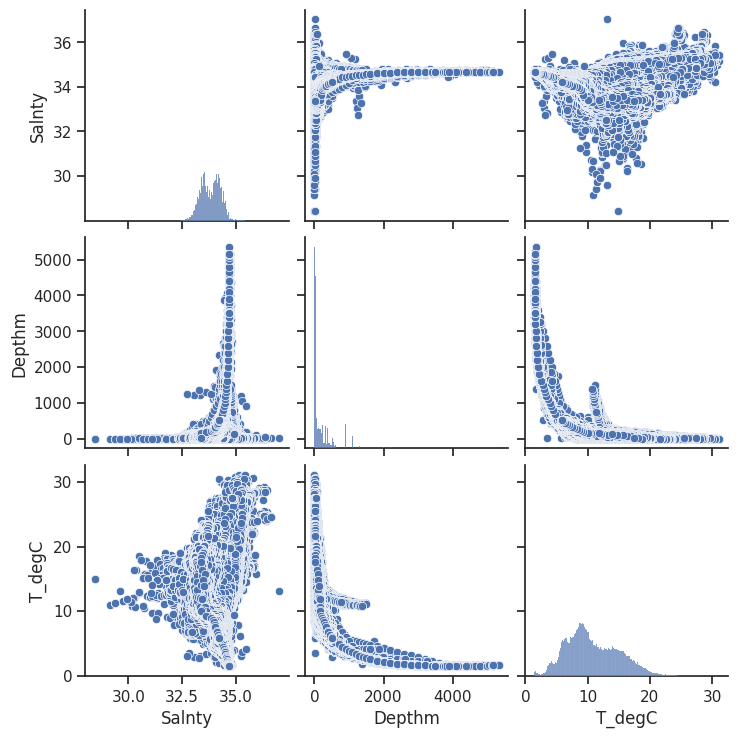

In [34]:
sns.set_theme(style='ticks')
sns.pairplot(data=df_regression)
plt.show()

For the regression model a heatmap can show the correlation between the given features.

<AxesSubplot: >

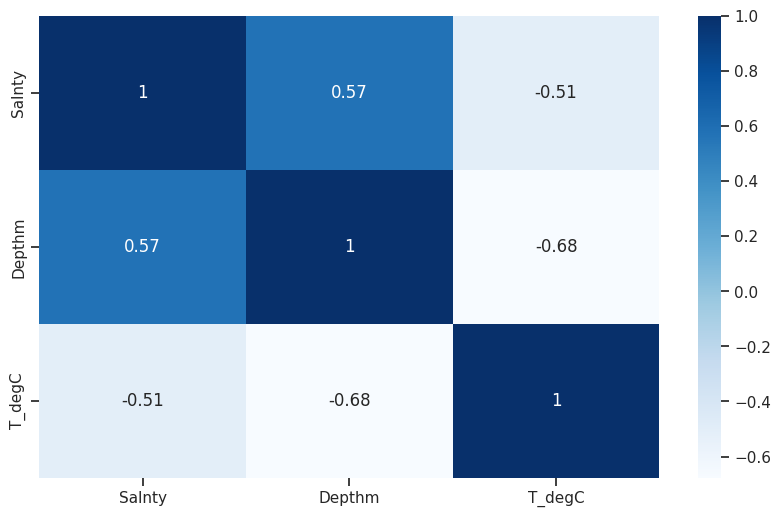

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_regression.corr(), cmap='Blues', annot=True)

## a) Feature engineering

Since the depth information seems to be long tailed in contrast to salinity which seems to be normally distributed, we can apply a *Log Transformation* to the Depth in m. We will apply the **Yeo-Johnson** transform which is similar to Box-Cox but allows negative data.

In [36]:
transform = PowerTransformer(method = "yeo-johnson", standardize = False)
df_regression["Depthm"] = transform.fit_transform(df_regression[["Depthm"]])

/tmp/ipykernel_8823/1667015928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression["Depthm"] = transform.fit_transform(df_regression[["Depthm"]])


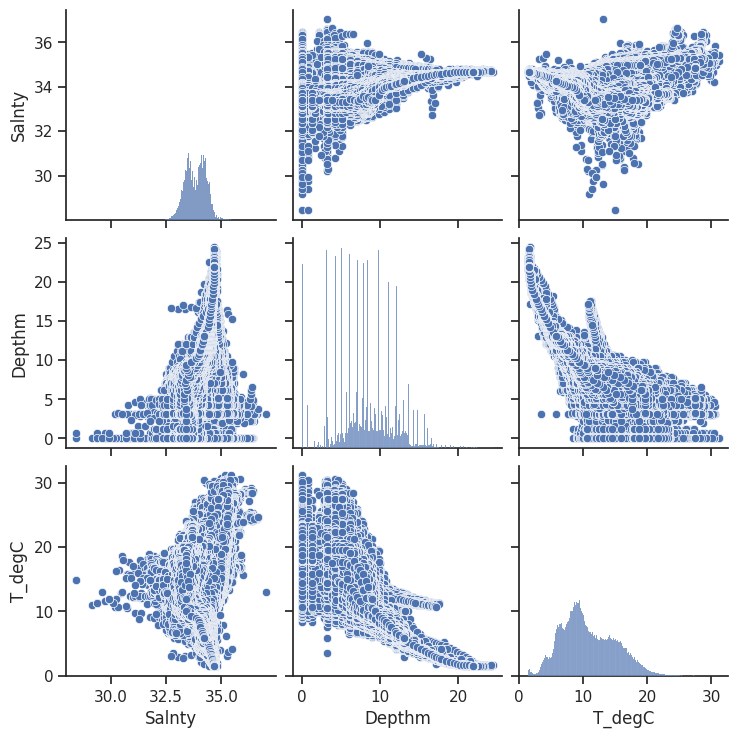

In [37]:
sns.set_theme(style='ticks')
sns.pairplot(data=df_regression)
plt.show()

<AxesSubplot: >

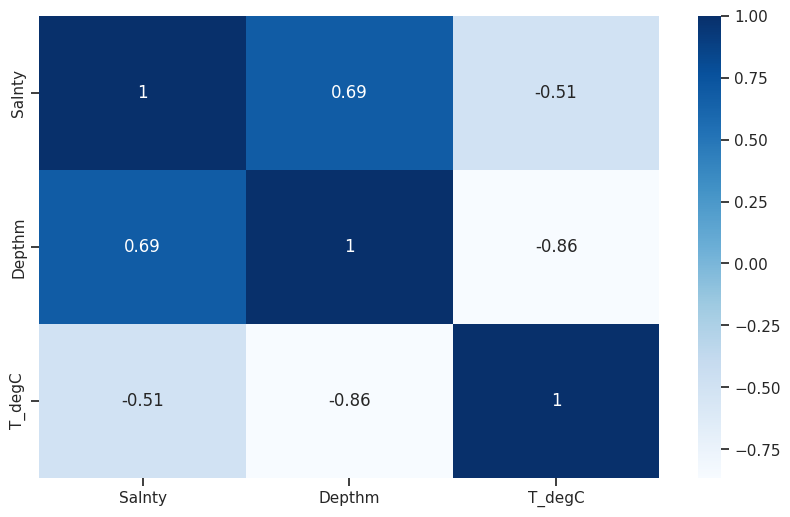

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_regression.corr(), cmap='Blues', annot=True)

As we can see, this transformation improved our correlation between the variables!

## b) Regression Application

When looking at the scatterplots, a linear relationship seems improbable. Therefore, we will use **polynomial regression** with a second or third degree polynomial:

In [ ]:
polyn_reg = make_pipeline(PolynomialFeatures(3),LinearRegression())
#TODO get data into correct format for fitting